# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** Kacper Pastuła

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [106]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


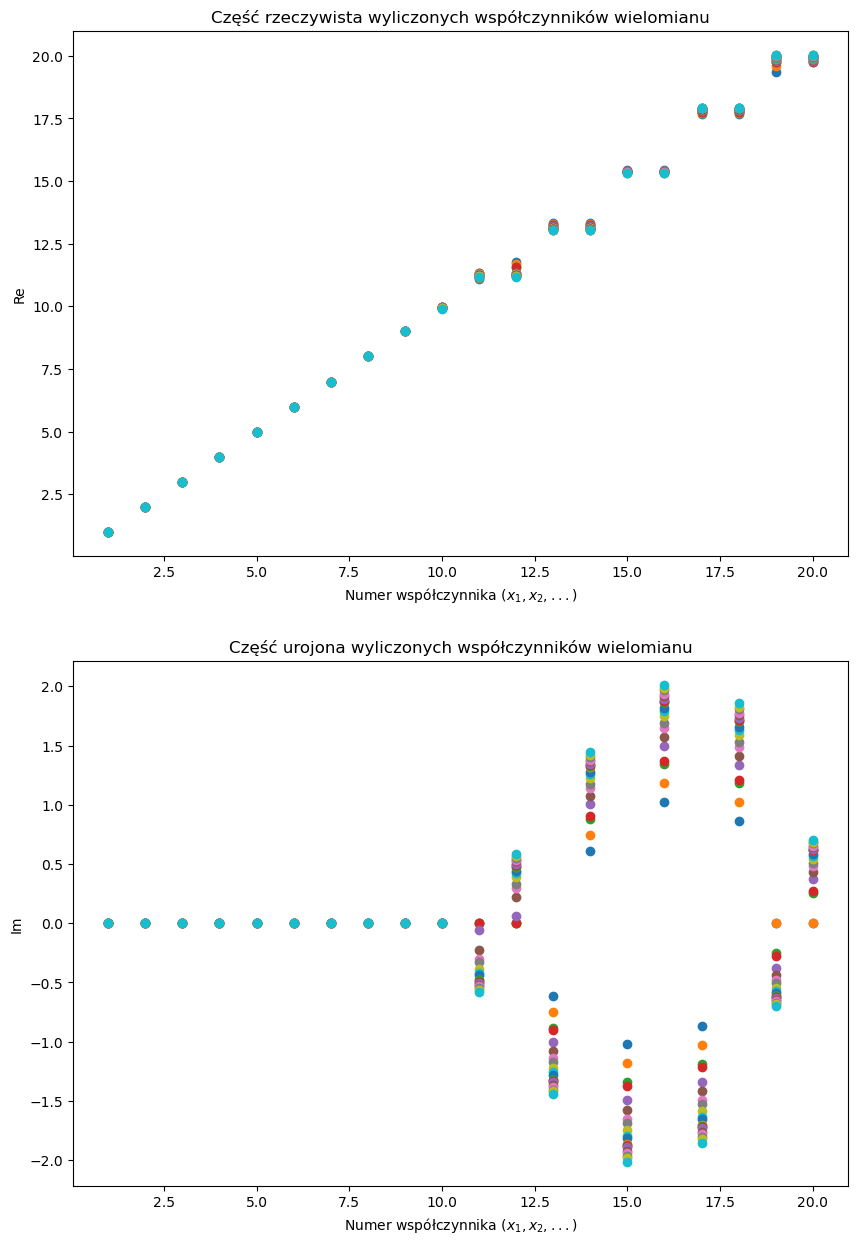

In [107]:
# ===== Twoja implementacja tutaj =====
roots1 = [1,2,3]
roots2 = np.linspace(1,20,20)

# #punkt 1
# print('wspolczynniki w1: ',nppoly.polyfromroots(roots1))


#punkt2
# print(main.roots_20(nppoly.polyfromroots(roots1)))
# print(main.roots_20(nppoly.polyfromroots(roots2)))

#punkt3
fig, ax = plt.subplots(2,1,figsize=(10,15))
ax[0].set_title('Część rzeczywista wyliczonych współczynników wielomianu')
ax[0].set_ylabel('Re')
ax[1].set_ylabel('Im')
ax[0].set_xlabel('Numer współczynnika ($x_1, x_2, ...$)')
ax[1].set_xlabel('Numer współczynnika ($x_1, x_2, ...$)')
ax[1].set_title('Część urojona wyliczonych współczynników wielomianu')   
a2 = nppoly.polyfromroots(roots2)
y = np.linspace(1,20,20)

for i in range(20):
    roots = main.roots_20(a2)
    a2 = roots[0]
    ax[0].scatter(y,np.real(roots[1]))
    ax[1].scatter(y,np.imag(roots[1]))




***Do zadania 1***
W pierwszym zadaniu poznajemy funkcje dostępne w bibliotece NumPy do wyznaczanie pierwiastków i współczynników wielomianów n-tego stopnia.

**Punkt 1** 
W punkcie pierwszym obliczamy współczynniki wielomianu w1. Najpierw tworzymy wektor miejsc zerowych, następnie wykorzystując funkcję *nppoly.polyfromroots* otrzymujemy wektor współczynników tego wielomianu. 

**Punkt 2** 
W drugim punkcie implementujemy funkcję *roots_20()*, która wyznacza miejsca zerowe wielomianu na podstawie wektora jego współczynników, funkcja dodatkowow lekko zaburza wejściowe współczynniki poprzez dodanie do nich losowej wartości o rozkładzie normalnym przemnożonej przez 1^(-10).

**Punkt 3** 
Następnie wyznaczamy wektor współczynników w2. Po wyznaczeniu współczynników w pętli 20 iteracji wyznaczamy pierwiastki zaburzonego wielomianu, po każdej iteracji ustawiamy zaburzony wektor współczynników jako nowy wektor, w każdej iteracji także wyrysowujemy część rzeczywistąi urojoną wyniku na wykresach.

Jak możemy zauważyc na wykresach - najbardziej wrażliwe na zaburzenia są pierwiastki od 11 do 20.Pierwiastki od 1 do 10 są wykreślane w każdej iteracji praktycznie w tym samym miejscu. oszacowanie uwarunkowanie pierwiastków liczy się ze wzoru:

$$
cond(f,d) = \frac{||f(x + \Delta x) - f(x)||}{||f(x)||} * \frac{||x||}{||\Delta x||}
$$

Gdzie ($x - \Delta x$) oznacza zaburzony pierwiastek, a $x$ miejsce zerowe wyliczone analitycznie.




---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Współczynniki wielomianu w3:  [  1.  -8.  28. -56.  70. -56.  28.  -8.   1.]
Macierz Frobeniusa dla wielomianu w3:
 [[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]


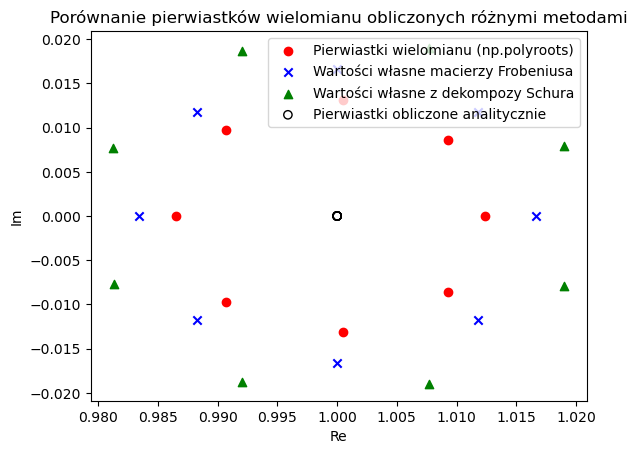

In [108]:
# ===== Twoja implementacja tutaj =====
w3_roots = np.ones(8)
#Punkt 1
coef = nppoly.polyfromroots(w3_roots)
print('Współczynniki wielomianu w3: ',coef)
F = main.frob_a(coef)
print('Macierz Frobeniusa dla wielomianu w3:\n',F)

#Punkt 2
eigenvalues = np.linalg.eigvals(F)
T,Z = sp.linalg.schur(F, output = 'complex')
eigenvalues_schur = np.diag(T)
roots = nppoly.polyroots(coef)

fig, ax = plt.subplots()
ax.scatter(np.real(roots),np.imag(roots),color='red',label='Pierwiastki wielomianu (np.polyroots)')
ax.scatter(np.real(eigenvalues),np.imag(eigenvalues),marker='x',color='blue',label='Wartości własne macierzy Frobeniusa')
ax.scatter(np.real(eigenvalues_schur),np.imag(eigenvalues_schur),marker='^',color='green',label='Wartości własne z dekompozy Schura')
ax.scatter(w3_roots,np.zeros_like(w3_roots),marker='o',facecolors='none',edgecolors='black',label='Pierwiastki obliczone analitycznie')
ax.set_title('Porównanie pierwiastków wielomianu obliczonych różnymi metodami')
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.legend()

**Do zadania 2**

**Punkt 1**
Na początku implementujemy funkcję *frob_a()*, która jako argument przyjmuje wektor współczynników pewnego wielomianu i zwraca macierz Frobeniusa stowarzyszoną z tym wielomianem. W implementacji wykorzystałem poznaną na poprzednich zajęciach funkcję *np.concatenate()*.

**Punkt 2**
W drugim punkcie wyznaczamy pierwiastki w3 na różne sposoby. na początku za pomocą *nppoly.polyfromroots()* tworzymy wektor współczynników w3.Pierwszy sposób, w jaki wyznaczymy pierwiastki to poprzez macierz Forbeniusa i funkcję *np.linalg.eigenvals()*. Wartości własne macierzy Frobeniusa są poszukiwanymi przez nas pierwiastkami w3. Drugi sposób to porzez rozkład Schura. ROzkładamy macierz Frobeniusa na iloczyn w postaci $F = ZTZ^{-1}$, gdzie szukane przez nas pierwiastki są na przekątnej macierzy T. Ostatni trzeci sposób to wyznczenie pierwiastków za pomocą funkcji *np.polyroots()*

**Punkt 3**
W trzecim punkcie porównujemy wyniki obliczone nmerycznie z wynikami otrzymanymi analitycznie na płaszczyznie zespolonej.

**Wnioski:** Miejsca zerowe wyznaczone każdym z trzech sposobów są z błędem. Pierwiastki otrzymane funkcją *polyroots()* są bliższe prawdy od tych otrzymanych za pomocą wartości własnych macierzy Frobeniusa i za pomocą rozkładu Schura, dodatkowo w przypadku rozkładu Schura żaden z ośmiu wyznaczonych pierwiastków nie jest liczbą rzeczywistą.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

Macierz Frobeniusa dla wielomianu w4:
 [[ 0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.        ]
 [-0.06584362  0.2962963   0.11522634 -2.2962963   4.07407407 -3.22222222
   2.        ]]


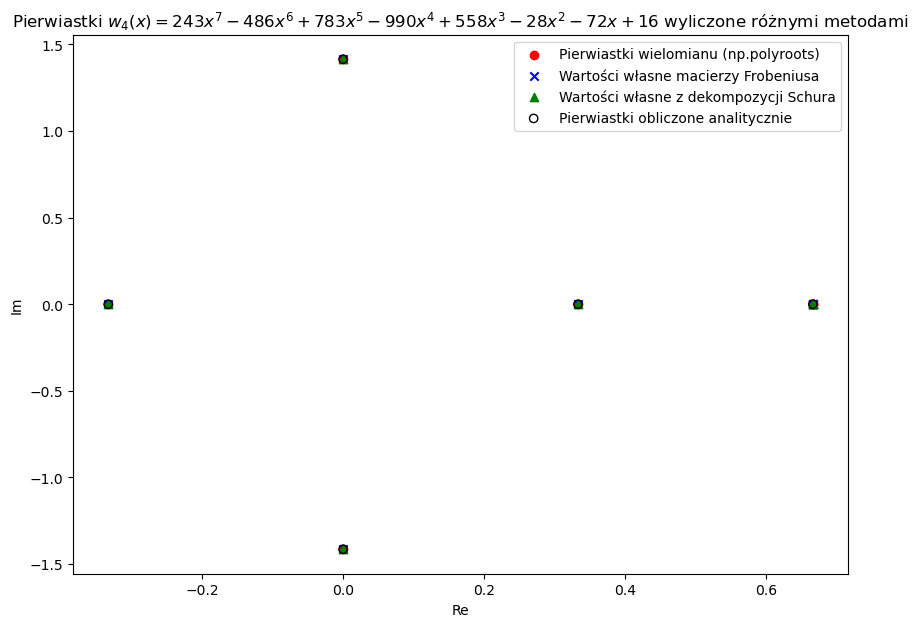

c:\Users\bazyl\anaconda3\envs\py310\lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\bazyl\anaconda3\envs\py310\lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


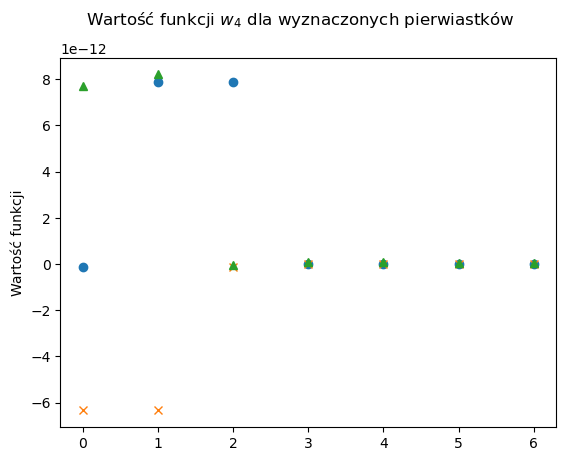

In [109]:
# ===== Twoja implementacja tutaj =====
coefs3 = np.array([16, -72, -28, 558, -990, 783, -486, 243])
roots_polyroots = nppoly.polyroots(coefs3)
F3 = main.frob_a(coefs3)
eigenvalues_F3 = np.linalg.eigvals(F3)
eigenvalues_schur_F3 = np.diag(sp.linalg.schur(F3, output='complex')[0])
print('Macierz Frobeniusa dla wielomianu w4:\n',F3)

#pierwiastki wyznaczone analitycznie 
roots_analitycznie = [-1/3,1/3,2/3, complex(0,np.sqrt(2)),complex(0,-np.sqrt(2))]

fig2, ax2 = plt.subplots()
fig2.set_size_inches(10,7)
ax2.scatter(np.real(roots_polyroots),np.imag(roots_polyroots),color='red',label='Pierwiastki wielomianu (np.polyroots)')
ax2.scatter(np.real(eigenvalues_F3),np.imag(eigenvalues_F3),marker='x',color='blue',label='Wartości własne macierzy Frobeniusa')
ax2.scatter(np.real(eigenvalues_schur_F3),np.imag(eigenvalues_schur_F3),marker='^',color='green',label='Wartości własne z dekompozycji Schura')
ax2.scatter(np.real(roots_analitycznie),np.imag(roots_analitycznie),marker='o',facecolors='none',edgecolors='black',label='Pierwiastki obliczone analitycznie')
ax2.set_title('Pierwiastki $w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16$ wyliczone różnymi metodami')
ax2.set_xlabel('Re')
ax2.set_ylabel('Im')
ax2.legend()
plt.show()
norm1 = []
norm2 = []
norm3 = []

#sprawdzam jaką otrzymam wartość funkcji po wstawieniu do niej wyznaczonych powyżej pierwiastków
w4 = lambda x: 243*x**7 - 486*x**6 + 783*x**5 - 990*x**4 + 558*x**3 - 28*x**2 - 72*x + 16
for root in roots_polyroots:
    norm1.append(w4(root))
for root in eigenvalues_F3:
    norm2.append(w4(root))
for root in eigenvalues_schur_F3:
    norm3.append(w4(root))
fig3, ax3 = plt.subplots()
fig3.suptitle('Wartość funkcji $w_4$ dla wyznaczonych pierwiastków')
ax3.set_ylabel('Wartość funkcji')
ax3.plot(norm1,'o')
ax3.plot(norm2,'x')
ax3.plot(norm3,'^')

***Do zadania 3*** 
W tym zadaniu również wyaznaczamy pierwiastki wielomianu na 3 sposoby i porównujemy wyniki. Tym razem pieriwastki wyznaczone wszystkimi trzema metodami są takie same i są one zgodne z pierwiastkami wyznaczonymi analitycznie (wyznaczono je za pomocą WolframAlpha). Dodatkowo sprawdziłem pierwiastki, które otrzymano tymi metodami poprzez ponowne wstawienie ich do funkcji i sprawdzenie jej wartości zgodnie z definicją pierwiastka wielomianu z sekcji **Cel zajęć**. Jak widać na powyższym wykresie wszystkie wyznaczone pierwiastki dają wartość funkcji w okolicach e-12, a zatem są wynaczone z bardzo dobrą dokładnością.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [110]:
# ===== Twoja implementacja tutaj =====
#Punkt 1
A = []
eigvals_an = []
A_eigvals = []

for n in [10, 20, 30]:
    v = np.zeros(n)
    for i in range(len(v)):
        v[i] = 2**(i+1)
    war = False
    while not war:
        P_m = np.diag(np.random.randint(0,100,(n)))
        war = main.is_nonsingular(P_m)
        
    eigvals_an.append(v)
    A.append(np.diag(v))

for i in range(len(A)):
    A_eigvals.append(np.linalg.eigvals(A[i]))

print("Dla n = 10:")
print("Wektor własności własnych obliczony analitycznie:")
print(eigvals_an[0])
print('\n')
print("Macierz A oraz wyznaczone wartości własne:")
print(A[0])
print(A_eigvals[0])
print('\n')
#Punkt 2
B = []
B_eigvals = []
for n in [10, 20, 30]:
    i = n/10 - 1
    war = False
    while not war:
        P_m = np.diag(np.random.randint(0,100,(n)))
        war = main.is_nonsingular(P_m)
    if n == 10:
        print("Utworzona macierz P:")
        print(P_m)
        print('\n')
    B.append(P_m @ A[int(i)] @ np.linalg.inv(P_m))
for i in range(len(B)):
    B_eigvals.append(np.linalg.eigvals(B[i]))

print("Macierz B oraz wyznaczone wartości własne:")
print(B[0])
print(B_eigvals[0])
print('\n')

#Punkt 3
C = []
C_eigvals = []
for i in range(len(A)):
    Q = np.linalg.qr(A[i])[0]
    C.append(Q @ A[i] @ np.linalg.inv(Q))
    if i == 0:
        print("Utworzona macierz Q:")
        print(Q)
        print('\n')
for i in range(len(C)):
    C_eigvals.append(np.linalg.eigvals(C[i]))
print("Macierz C oraz wyznaczone wartości własne:")   
print(C[0])
print(C_eigvals[0])
print('\n')

#Punkt 4
F = []
F_eigvals = []

for i in range(len(eigvals_an)):
    F.append(main.frob_a(nppoly.polyfromroots(eigvals_an[i])))
    F_eigvals.append(sorted(np.linalg.eigvals(F[i])))
print("Macierz Frobeniusa i jej wartości własne:")
print(F[0])
print(F_eigvals[0])
print('\n')

#punkt 5
max_error_A = []
mean_error_A = []
for i in range(len(A_eigvals)):
    error_A = 0
    max_error_Ai = 0
    for j in range(len(A_eigvals[i])):
        if abs(A_eigvals[i][j] - eigvals_an[i][j]) > max_error_Ai:
            max_error_Ai = abs(A_eigvals[i][j] - eigvals_an[i][j])
        error_A += abs(A_eigvals[i][j] - eigvals_an[i][j])
    max_error_A.append(max_error_Ai)
    mean_error_A.append(error_A/len(A_eigvals[i]))


max_error_B = []
mean_error_B = []
for i in range(len(B_eigvals)):
    error_B = 0
    max_error_Bi = 0
    for j in range(len(B_eigvals[i])):
        if abs(B_eigvals[i][j] - eigvals_an[i][j]) > max_error_Bi:
            max_error_Bi = abs(B_eigvals[i][j] - eigvals_an[i][j])
        error_B += abs(B_eigvals[i][j] - eigvals_an[i][j])
    max_error_B.append(max_error_Bi)
    mean_error_B.append(error_B/len(B_eigvals[i]))

max_error_C = []
mean_error_C = []
for i in range(len(C_eigvals)):
    error_C = 0
    max_error_Ci = 0
    for j in range(len(C_eigvals[i])):
        if abs(C_eigvals[i][j] - eigvals_an[i][j]) > max_error_Ci:
            max_error_Ci = abs(C_eigvals[i][j] - eigvals_an[i][j])
        error_C += abs(C_eigvals[i][j] - eigvals_an[i][j])
    max_error_C.append(max_error_Ci)
    mean_error_C.append(error_C/len(C_eigvals[i]))


max_error_F = []
mean_error_F = []
for i in range(len(F_eigvals)):
    error_F = 0
    max_error_Fi = 0
    for j in range(len(F_eigvals[i])):
        if abs(F_eigvals[i][j] - eigvals_an[i][j]) > max_error_Fi:
            max_error_Fi = abs(F_eigvals[i][j] - eigvals_an[i][j])
        error_F += abs(F_eigvals[i][j] - eigvals_an[i][j])
    max_error_F.append(max_error_Fi)
    mean_error_F.append(error_F/len(F_eigvals[i]))


for i, n in enumerate([10, 20, 30]):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")


Dla n = 10:
Wektor własności własnych obliczony analitycznie:
[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


Macierz A oraz wyznaczone wartości własne:
[[   2.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    4.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    8.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.   16.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.   32.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.   64.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  128.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  256.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  512.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0. 1024.]]
[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


Utworzona macierz P:
[[64  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 72  0  0  0  0  0  0  0]
 [ 0  0  0 76  0

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)